# Tree figures

* This script uses the differential abundance outputs and the phylogenetic tree to generate output files for import into the tree of life
* 


In [1]:
out_Dir = '~/Hyphosphere/data/3Exp/figures'

work_dir = '~/Hyphosphere/data/3Exp/DESeq'

# phyloseq - full object with tree
physeq_file = '~/Hyphosphere/data/3Exp/phyloseq/3Exp_phyloseq_thresh_wtree_experimental_woContam.rds'

In [2]:
library(RColorBrewer)
library(plyr)
library(tidyr)
library(dplyr)
library(reshape2)
library(phyloseq)
library(ggplot2)
library(ggtree)
library(gridExtra)

Warning message:
“package ‘RColorBrewer’ was built under R version 3.6.1”Warning message:
“package ‘plyr’ was built under R version 3.6.1”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
“package ‘reshape2’ was built under R version 3.6.1”
Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Warning message:
“package ‘phyloseq’ was built under R version 3.6.1”Warning message:
“package ‘ggplot2’ was built under R version 3.6.1”Warning message:
“package ‘ggtree’ was built under R version 3.6.1”Registered S3 method overwritten by 'treeio':
  method     from
  root.phylo ape 
ggtree v2.0.0  For help: https://yulab-smu.github.io/treedata-book/

If yo

In [3]:
g_legend <- function(a.gplot){
  tmp <- ggplot_gtable(ggplot_build(a.gplot))
  leg <- which(sapply(tmp$grobs, function(x) x$name) == "guide-box")
  legend <- tmp$grobs[[leg]]
  return(legend)
}



In [4]:
ps = readRDS(physeq_file) %>% subset_taxa(., !is.na(Phylum)) %>%
    # remove non-experimental controls
    
    subset_samples(., SampleType != "GV" & Experiment %in% c(1,2) & Fungus == "Gv" & SampleType %in% c("CS","CH") & Soil != "Sand") %>%

     # re-normalize after subsetting taxa
    transform_sample_counts(., function(x) x/sum(x))

ps


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
A

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 18707 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 18707 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 18707 tips and 18706 internal nodes ]

In [5]:
ps.m = ps %>%
    psmelt() %>%
    group_by(OTU, Soil, Experiment) %>%
    summarise(mAbund = mean(Abundance)) %>%
    ungroup() %>% 
    group_by(OTU) %>%
    summarise(smAbund = sum(mAbund)) 
head(ps.m)

Warning message in psmelt(.):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
`summarise()` regrouping output by 'OTU', 'Soil' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


OTU,smAbund
ASV100,8.172735e-03
ASV1000,1.517569e-03
ASV10000,0.000000e+00
ASV10001,2.481481e-05
ASV10002,1.075044e-04
ASV10003,6.691852e-05


### Top 60 most abundant taxa

In [6]:
topTax = ps.m %>% 
    arrange(desc(smAbund)) %>%
    .[1:200,] %>%
    .$OTU %>%
    as.character()

topTax
            

[1] "ASV5"    "ASV6"    "ASV57"   "ASV14"   "ASV18"   "ASV61"   "ASV16"  
  [8] "ASV103"  "ASV39"   "ASV33"   "ASV148"  "ASV25"   "ASV943"  "ASV21"  
 [15] "ASV47"   "ASV118"  "ASV143"  "ASV915"  "ASV23"   "ASV718"  "ASV24"  
 [22] "ASV17"   "ASV71"   "ASV46"   "ASV29"   "ASV40"   "ASV44"   "ASV69"  
 [29] "ASV64"   "ASV55"   "ASV648"  "ASV77"   "ASV338"  "ASV247"  "ASV1132"
 [36] "ASV98"   "ASV168"  "ASV50"   "ASV66"   "ASV37"   "ASV383"  "ASV36"  
 [43] "ASV104"  "ASV288"  "ASV60"   "ASV65"   "ASV1847" "ASV259"  "ASV246" 
 [50] "ASV81"   "ASV286"  "ASV961"  "ASV30"   "ASV661"  "ASV91"   "ASV138" 
 [57] "ASV514"  "ASV1925" "ASV126"  "ASV230"  "ASV873"  "ASV204"  "ASV73"  
 [64] "ASV87"   "ASV190"  "ASV99"   "ASV169"  "ASV282"  "ASV509"  "ASV97"  
 [71] "ASV195"  "ASV154"  "ASV134"  "ASV615"  "ASV448"  "ASV1412" "ASV3052"
 [78] "ASV100"  "ASV312"  "ASV218"  "ASV74"   "ASV27"   "ASV133"  "ASV1260"
 [85] "ASV527"  "ASV475"  "ASV175"  "ASV250"  "ASV232"  "ASV179"  "ASV820" 
 [92] "ASV434"  "ASV406"  "ASV397"  "ASV262"  "ASV79"   "ASV93"   "ASV89"  
 [99] "ASV330"  "ASV95"   "ASV2527" "ASV116"  "ASV101"  "ASV2435" "ASV189" 
[106] "ASV356"  "ASV478"  "ASV121"  "ASV72"   "ASV96"   "ASV147"  "ASV2473"
[113] "ASV200"  "ASV2294" "ASV3261" "ASV227"  "ASV1053" "ASV341"  "ASV217" 
[120] "ASV161"  "ASV221"  "ASV1447" "ASV160"  "ASV117"  "ASV2529" "ASV306" 
[127] "ASV236"  "ASV180"  "ASV388"  "ASV335"  "ASV113"  "ASV672"  "ASV759" 
[134] "ASV692"  "ASV124"  "ASV129"  "ASV111"  "ASV2494" "ASV228"  "ASV317" 
[141] "ASV283"  "ASV423"  "ASV125"  "ASV567"  "ASV336"  "ASV501"  "ASV114" 
[148] "ASV436"  "ASV176"  "ASV42"   "ASV401"  "ASV2725" "ASV8"    "ASV333" 
[155] "ASV139"  "ASV556"  "ASV2261" "ASV32"   "ASV827"  "ASV846"  "ASV115" 
[162] "ASV108"  "ASV866"  "ASV132"  "ASV68"   "ASV15"   "ASV1355" "ASV122" 
[169] "ASV3626" "ASV511"  "ASV625"  "ASV137"  "ASV342"  "ASV109"  "ASV3378"
[176] "ASV251"  "ASV106"  "ASV123"  "ASV473"  "ASV344"  "ASV611"  "ASV58"  
[183] "ASV290"  "ASV476"  "ASV241"  "ASV3290" "ASV502"  "ASV2583" "ASV390" 
[190] "ASV507"  "ASV261"  "ASV581"  "ASV393"  "ASV522"  "ASV318"  "ASV85"  
[197] "ASV370"  "ASV577"  "ASV471"  "ASV462"

In [7]:
rm(ps.m)

In [8]:
# Filter to the top OTUs identified above

physeq.thresh <- prune_taxa(topTax, ps)

physeq.thresh


Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 200 taxa and 58 samples ]
sample_data() Sample Data:       [ 58 samples by 11 sample variables ]
tax_table()   Taxonomy Table:    [ 200 taxa by 6 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 200 tips and 199 internal nodes ]

In [9]:

MyTree =  physeq.thresh %>% phy_tree


In [10]:
TreeTax = taxa_names(physeq.thresh)

In [11]:
df.tax = physeq.thresh %>% tax_table %>% as.data.frame
df.tax$OTU = df.tax %>% row.names

df.tax = mutate(df.tax, TaxLabel = paste(Family, Genus, sep = "_")) %>%
    select(OTU, TaxLabel, Phylum, Class, Order, Family, Genus)




## Relative Abundance data

In [12]:
mdf = psmelt(physeq.thresh)
mdf.byOTU = ddply(mdf, .(Soil, OTU, Experiment), summarize, mean_Abundance = mean(Abundance)) 
head(mdf.byOTU)

Warning message in psmelt(physeq.thresh):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


Soil,OTU,Experiment,mean_Abundance
Florence,ASV100,1,0.0008744882
Florence,ASV100,2,0.0016464922
Florence,ASV101,1,0.0022462499
Florence,ASV101,2,0.0015770379
Florence,ASV103,1,0.0143862940
Florence,ASV103,2,0.0020775208


In [586]:
# #cast by Plant
# dfc = dcast(mdf.byOTU, OTU ~ Soil + SampleType) %>%
#     select(OTU, Lansing_CS, Lansing_CH, Florence_CS, Florence_CH, Pendelton_CS, Pendelton_CH) %>%
#     'rownames<-' (dfc$OTU)
# head(dfc)

### log2FoldChange data

In [39]:
readfile = file.path(work_dir, 'dfl2fc-Exp1.txt')
df.l2fc.Exp1 = read.table(readfile, header = TRUE, sep= '\t')

readfile = file.path(work_dir, 'dfl2fc-Exp2.txt')
df.l2fc.Exp2 = read.table(readfile, header = TRUE, sep= '\t')

df.l2fc = bind_rows(df.l2fc.Exp1, df.l2fc.Exp2)
df.l2fc = df.l2fc %>% separate(Subset, c("Soil","Fungus")) %>% filter(Contrast %in% c("CH_CS", "CH_BS", "CH_BP", "RH_RS") & Fungus == "Gv")


In [16]:
head(df.l2fc)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,OTU,Soil,Fungus,Term,Contrast,DAI,Kingdom,Phylum,Class,Order,Family,Genus,Experiment
331.72029,-2.716566,0.5217389,-5.206754,1.921730e-07,1.885675e-05,ASV5,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Pseudarthrobacter,1
136.95264,4.977612,1.1905977,4.180767,2.905274e-05,1.192425e-03,ASV6,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrio,1
0.00000,NA,NA,NA,NA,NA,ASV8,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Asticcacaulis,1
0.00000,NA,NA,NA,NA,NA,ASV13,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,1
26.70389,8.430000,1.7857267,4.720767,2.349571e-06,1.478663e-04,ASV14,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA,1
0.00000,NA,NA,NA,NA,NA,ASV15,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA,1


In [607]:

#df.l2fc$Soil = separate(df.l2fc$Subset,"-")[[1]][1]
#head(df.l2fc)

# df.ra = dcast(mdf.byOTU, OTU ~ Experiment + SampleType + Soil, value.var = "mean_Abundance")
# rownames(df.ra) = df.ra$OTU
# df.ra = select(df.ra, "1_CS_Lansing", "2_CS_Lansing", "1_CS_Florence", "2_CS_Florence", "1_CS_Pendelton", "2_CS_Pendelton",
#               "1_CH_Lansing", "2_CH_Lansing", "1_CH_Florence", "2_CH_Florence", "1_CH_Pendelton", "2_CH_Pendelton")
# head(df.ra)

Joining, by = c("OTU", "Soil", "Experiment")
Warning message:
“Column `OTU` joining factor and character vector, coercing into character vector”

OTU,Soil,Experiment,padj,mean_Abundance,log2FoldChange,Phylum,Order,Class,Family,Genus
ASV5,Lansing,1,1.885675e-05,0.020395195,-2.7165660,Actinobacteria,Micrococcales,Actinobacteria,Micrococcaceae,Pseudarthrobacter
ASV6,Lansing,1,1.192425e-03,0.009201270,4.9776118,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrionaceae,Cellvibrio
ASV14,Lansing,1,1.478663e-04,0.001813107,8.4299996,Proteobacteria,Myxococcales,Deltaproteobacteria,Sandaracinaceae,NA
ASV16,Lansing,1,6.618920e-01,0.005376328,-0.6640584,Proteobacteria,Rhizobiales,Alphaproteobacteria,Xanthobacteraceae,Bradyrhizobium
ASV17,Lansing,1,NA,0.000000000,NA,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Paucibacter
ASV18,Lansing,1,2.004166e-13,0.010919483,11.0823839,Proteobacteria,Myxococcales,Deltaproteobacteria,Sandaracinaceae,NA


In [40]:
tmp = left_join(df.l2fc, mdf.byOTU) %>%
    select(OTU, Soil, Experiment, padj, Contrast, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus) %>%
    filter(OTU %in% TreeTax)


tmp$Phylum = factor(tmp$Phylum)
tmp$Order = factor(tmp$Order)
tmp$Class = factor(tmp$Class)

#Link phylum colors 
FigPhyla = tmp$Phylum %>% levels() %>% as.character()
FigClass = tmp$Class %>% levels() %>% as.character()
FigOrder = tmp$Order %>% levels() %>% as.character()
FigOrder

ColorCount = length(FigOrder)
getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
Ocs = getPalette(ColorCount)
Ocs


ColorCount = length(FigPhyla)
getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
Pcs = getPalette(ColorCount)
Pcs

ColorCount = length(FigClass)
getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
Ccs = getPalette(ColorCount)
Ccs


# Pcs = brewer.pal(12,"Set3")

#Set lookup to 
Olookup = cbind(FigOrder, Ocs) %>% as.data.frame()
Plookup = cbind(FigPhyla, Pcs) %>% as.data.frame()
Clookup = cbind(FigClass, Ccs) %>% as.data.frame()

tmp = left_join(tmp, Plookup, by = c("Phylum" = "FigPhyla"))
tmp = left_join(tmp, Olookup, by = c("Order" = "FigOrder")) 
tmp = left_join(tmp, Clookup, by = c("Class" = "FigClass")) 



tmp %>% head()

Joining, by = c("OTU", "Soil", "Experiment")


[1] "Acidiferrobacterales"               "Ardenticatenales"                  
 [3] "Azospirillales"                     "Bacillales"                        
 [5] "Betaproteobacteriales"              "Caulobacterales"                   
 [7] "CCD24"                              "Cellvibrionales"                   
 [9] "Chloroflexales"                     "Chthoniobacterales"                
[11] "Corynebacteriales"                  "Cytophagales"                      
[13] "Dongiales"                          "Fibrobacterales"                   
[15] "Frankiales"                         "Gaiellales"                        
[17] "Gammaproteobacteria_Incertae_Sedis" "Gemmatimonadales"                  
[19] "IMCC26256"                          "Kallotenuales"                     
[21] "Micrococcales"                      "Myxococcales"                      
[23] "Nitrospirales"                      "Nostocales"                        
[25] "Oligoflexales"                      "Pedosphaerales"                    
[27] "Pirellulales"                       "Planctomycetales"                  
[29] "Pseudomonadales"                    "Pseudonocardiales"                 
[31] "Pyrinomonadales"                    "Reyranellales"                     
[33] "Rhizobiales"                        "Rokubacteriales"                   
[35] "SBR1031"                            "Solirubrobacterales"               
[37] "Sphingobacteriales"                 "Sphingomonadales"                  
[39] "Steroidobacterales"                 "Streptomycetales"                  
[41] "Thermomicrobiales"                  "Xanthomonadales"

[1] "#1B9E77" "#3B9363" "#5B884F" "#7C7D3B" "#9C7227" "#BD6813" "#D65F06"
 [8] "#C56224" "#B46542" "#A36860" "#926B7F" "#816D9D" "#7A6CB0" "#8E60AA"
[15] "#A154A3" "#B4489B" "#C83C94" "#DB2F8D" "#DD3282" "#C7476F" "#B15C5D"
[22] "#9B724A" "#858738" "#6F9C25" "#72A61B" "#88A716" "#9EA811" "#B4A90C"
[29] "#C9A908" "#DFAA03" "#DEA405" "#D39B09" "#C8920E" "#BD8913" "#B28017"
[36] "#A7771C" "#9C7327" "#917034" "#866E40" "#7B6B4D" "#706859" "#666666"

[1] "#1B9E77" "#897932" "#C8611F" "#8D6B86" "#9B58A5" "#DD2E8D" "#A66753"
 [8] "#70A61B" "#BBA90B" "#D59D08" "#B07E18" "#8B6F3B" "#666666"

[1] "#1B9E77" "#528B54" "#897932" "#C16610" "#C8611F" "#AB6653" "#8D6B86"
 [8] "#796DB1" "#9B58A5" "#BC4399" "#DD2E8D" "#CC4373" "#A66753" "#808B34"
[15] "#70A61B" "#96A713" "#BBA90B" "#E0AA03" "#D59D08" "#C38E10" "#B07E18"
[22] "#9D7426" "#8B6F3B" "#786A50" "#666666"

OTU,Soil,Experiment,padj,Contrast,mean_Abundance,log2FoldChange,Phylum,Order,Class,Family,Genus,Pcs,Ocs,Ccs
ASV5,Lansing,1,1.885675e-05,CH_CS,0.0075998216,-2.716566,Actinobacteria,Micrococcales,Actinobacteria,Micrococcaceae,Pseudarthrobacter,#897932,#B15C5D,#528B54
ASV5,Lansing,1,1.885675e-05,CH_CS,0.0331905683,-2.716566,Actinobacteria,Micrococcales,Actinobacteria,Micrococcaceae,Pseudarthrobacter,#897932,#B15C5D,#528B54
ASV6,Lansing,1,1.192425e-03,CH_CS,0.0180742636,4.977612,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrionaceae,Cellvibrio,#B07E18,#C56224,#CC4373
ASV6,Lansing,1,1.192425e-03,CH_CS,0.0003282771,4.977612,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrionaceae,Cellvibrio,#B07E18,#C56224,#CC4373
ASV8,Lansing,1,NA,CH_CS,0.0000000000,NA,Proteobacteria,Caulobacterales,Alphaproteobacteria,Caulobacteraceae,Asticcacaulis,#B07E18,#BD6813,#C16610
ASV8,Lansing,1,NA,CH_CS,0.0000000000,NA,Proteobacteria,Caulobacterales,Alphaproteobacteria,Caulobacteraceae,Asticcacaulis,#B07E18,#BD6813,#C16610


# Test basic ggtree

## add genus labels

In [19]:
df.tax = df.tax %>%
    mutate(GenusLabel = ifelse(!is.na(Genus), paste(Genus), 
                        ifelse(!is.na(Family), paste('Uncl. ', Family, sep = ""), 
                        ifelse(!is.na(Order), paste('Uncl. ', Order, sep = ""),
                        ifelse(!is.na(Class), paste('Uncl. ', Class, sep = ""), paste("Uncl. ", Phylum, sep = "")))))) %>%
    mutate(GenusLabel = ifelse(GenusLabel == 'Allorhizobium-Neorhizobium-Pararhizobium-Rhizobium', 'Allo-Neo-Para-Rhizobium', GenusLabel))
head(df.tax)

OTU,TaxLabel,Phylum,Class,Order,Family,Genus,GenusLabel
ASV109,Pedosphaeraceae_NA,Verrucomicrobia,Verrucomicrobiae,Pedosphaerales,Pedosphaeraceae,NA,Uncl. Pedosphaeraceae
ASV37,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV55,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV502,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV108,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter
ASV230,Chthoniobacteraceae_Candidatus_Udaeobacter,Verrucomicrobia,Verrucomicrobiae,Chthoniobacterales,Chthoniobacteraceae,Candidatus_Udaeobacter,Candidatus_Udaeobacter


# Try circular tree

In [769]:
mdf.byOTU %>% filter(OTU == 'ASV5')

Soil,OTU,Experiment,mean_Abundance
Florence,ASV5,1,0.01409202
Florence,ASV5,2,0.03264413
Lansing,ASV5,1,0.02039519
Lansing,ASV5,2,0.02613742
Pendelton,ASV5,1,0.00507399
Pendelton,ASV5,2,0.02831591


In [771]:
# tmp = left_join(df.l2fc, mdf.byOTU) %>%
#     select(OTU, Soil, Experiment, padj, mean_Abundance, log2FoldChange, Phylum, Order, Class, Family, Genus) %>%
#     filter(OTU %in% TreeTax)


# tmp$Phylum = factor(tmp$Phylum)
# tmp$Order = factor(tmp$Order)
# tmp$Class = factor(tmp$Class)

# #Link phylum colors 
# FigPhyla = tmp$Phylum %>% levels() %>% as.character()
# FigClass = tmp$Class %>% levels() %>% as.character()
# FigOrder = tmp$Order %>% levels() %>% as.character()
# FigOrder

# ColorCount = length(FigOrder)
# getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
# Ocs = getPalette(ColorCount)
# Ocs


# ColorCount = length(FigPhyla)
# getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
# Pcs = getPalette(ColorCount)
# Pcs

# ColorCount = length(FigClass)
# getPalette = colorRampPalette(brewer.pal(8, "Dark2"))
# Ccs = getPalette(ColorCount)
# Ccs


# # Pcs = brewer.pal(12,"Set3")

# #Set lookup to 
# Olookup = cbind(FigOrder, Ocs) %>% as.data.frame()
# Plookup = cbind(FigPhyla, Pcs) %>% as.data.frame()
# Clookup = cbind(FigClass, Ccs) %>% as.data.frame()

# tmp = left_join(tmp, Plookup, by = c("Phylum" = "FigPhyla"))
# tmp = left_join(tmp, Olookup, by = c("Order" = "FigOrder")) 
# tmp = left_join(tmp, Clookup, by = c("Class" = "FigClass")) 



# tmp %>% head()

Joining, by = c("OTU", "Soil", "Experiment")
Warning message:
“Column `OTU` joining factor and character vector, coercing into character vector”

[1] "Acidiferrobacterales"               "Bacillales"                        
 [3] "Betaproteobacteriales"              "Cellvibrionales"                   
 [5] "Chthoniobacterales"                 "Corynebacteriales"                 
 [7] "Cytophagales"                       "Fibrobacterales"                   
 [9] "Gaiellales"                         "Gammaproteobacteria_Incertae_Sedis"
[11] "Gemmatimonadales"                   "Micrococcales"                     
[13] "Myxococcales"                       "Nitrospirales"                     
[15] "Nostocales"                         "Pseudonocardiales"                 
[17] "Rhizobiales"                        "Rokubacteriales"                   
[19] "SBR1031"                            "Sphingomonadales"                  
[21] "Steroidobacterales"

[1] "#1B9E77" "#5D874E" "#A07125" "#D35F0A" "#B16548" "#8D6B86" "#8068AE"
 [8] "#A850A0" "#D03792" "#D33B79" "#A66753" "#79932E" "#7FA718" "#ACA80E"
[15] "#D9AA04" "#D59D08" "#BF8B12" "#A9781B" "#927132" "#7C6B4C" "#666666"

[1] "#1B9E77" "#93752C" "#BD6332" "#7E6EA2" "#B3499C" "#CF3F76" "#7D8F31"
 [8] "#A0A811" "#E0A604" "#B78415" "#8E7037" "#666666"

[1] "#1B9E77" "#738040" "#CC6309" "#B16548" "#826D9B" "#9B58A5" "#D03792"
 [8] "#C44A6D" "#88843A" "#7FA718" "#BBA90B" "#DDA305" "#BF8B12" "#A17421"
[15] "#836D43" "#666666"

OTU,Soil,Experiment,padj,mean_Abundance,log2FoldChange,Phylum,Order,Class,Family,Genus,Pcs,Ocs,Ccs
ASV5,Lansing,1,1.885675e-05,0.020395195,-2.7165660,Actinobacteria,Micrococcales,Actinobacteria,Micrococcaceae,Pseudarthrobacter,#93752C,#79932E,#1B9E77
ASV6,Lansing,1,1.192425e-03,0.009201270,4.9776118,Proteobacteria,Cellvibrionales,Gammaproteobacteria,Cellvibrionaceae,Cellvibrio,#B78415,#D35F0A,#C44A6D
ASV14,Lansing,1,1.478663e-04,0.001813107,8.4299996,Proteobacteria,Myxococcales,Deltaproteobacteria,Sandaracinaceae,NA,#B78415,#7FA718,#9B58A5
ASV16,Lansing,1,6.618920e-01,0.005376328,-0.6640584,Proteobacteria,Rhizobiales,Alphaproteobacteria,Xanthobacteraceae,Bradyrhizobium,#B78415,#BF8B12,#738040
ASV17,Lansing,1,NA,0.000000000,NA,Proteobacteria,Betaproteobacteriales,Gammaproteobacteria,Burkholderiaceae,Paucibacter,#B78415,#A07125,#C44A6D
ASV18,Lansing,1,2.004166e-13,0.010919483,11.0823839,Proteobacteria,Myxococcales,Deltaproteobacteria,Sandaracinaceae,NA,#B78415,#7FA718,#9B58A5


### Simple two color heat map

In [66]:

df.circ = df.l2fc %>%
    filter(Fungus == "Gv") %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", 
                 ifelse(log2FoldChange <= 0, "ns", "sig")), 
           variable = paste(Soil,Experiment, sep = '')) %>%
    select(OTU, variable, Contrast, sig) %>%
    dcast(OTU ~ variable + Contrast) 
head(df.circ)
df.circ = df.circ %>%
    mutate(Blank1 = "blank", 
          Blank2 = "blank")

rownames(df.circ) = df.circ$OTU
df.circ = df.circ %>% select(-OTU)
#head(df.circ)
head(df.circ)

OTU,variable,Contrast,sig
ASV5,Lansing1,CH_CS,ns
ASV6,Lansing1,CH_CS,sig
ASV8,Lansing1,CH_CS,ns
ASV13,Lansing1,CH_CS,ns
ASV14,Lansing1,CH_CS,sig
ASV15,Lansing1,CH_CS,ns


In [ ]:
testcirc = df.circ %>% select("Lansing2_CH_CS","Lansing2_CH_BS", "Lansing2_CH_BP","Lansing2_RH_RS","Blank1", 
                              "Florence2_CH_CS","Florence2_CH_BS", "Florence2_CH_BP","Florence2_RH_RS", "Blank2",
                             "Pendelton2_CH_CS","Pendelton2_CH_BS", "Pendelton2_CH_BP","Pendelton2_RH_RS")
head(testcirc)

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Duplicated aesthetics after name standardisation: size”Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


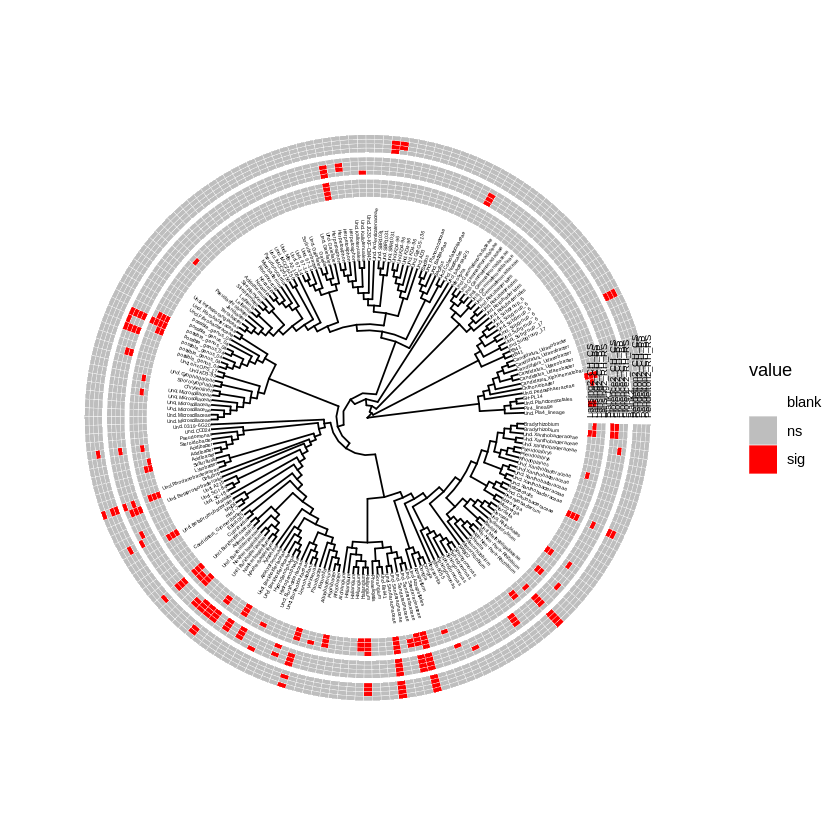

In [65]:
p  = ggtree(MyTree, layout = "circular", branch.length = "none") %<+% df.tax
#p = ggtree(MyTree)%<+% df.tax
p = p +  geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 1)

p = gheatmap(p, testcirc, offset=10, width=0.4, colnames_position = "top", 
         colnames_angle=90, hjust=0, colnames_offset_y = .25, font.size = 2) +
       scale_fill_manual(breaks=c("blank", "ns", "sig" ),values=c("White", "Grey", "Red"))
           # scale_fill_viridis_d(option="D", name='discrete\nvalue')
            # scale_color_manual(breaks=c("ns", "sig"), values=c("White", "Red"), name="HASV")


#p2 <- p1 + new_scale_fill()
p

### For multicolor heatmap

In [69]:
df.circ = df.l2fc %>%
    filter(Fungus == "Gv") %>%
    mutate(sig = ifelse(padj >= 0.05 | is.na(padj), "ns", 
                 ifelse(log2FoldChange <= 0, "ns", "sig")), 
           variable = paste(Soil,Experiment, sep = '')) %>%

    mutate(sig = ifelse(Contrast == "CH_CS" & sig == "sig", 1,
                       ifelse(Contrast == "CH_BS" & sig == "sig", 2,
                           ifelse(Contrast == "CH_BP" & sig == "sig", 3,  
                                 ifelse(Contrast == "RH_RS" & sig == "sig", 4,
                                       "ns"))))) %>%
    select(OTU, variable, Contrast, sig) %>%
    dcast(OTU ~ variable + Contrast) 
head(df.circ)
df.circ = df.circ %>%
    mutate(Blank1 = "blank", 
          Blank2 = "blank")

rownames(df.circ) = df.circ$OTU
df.circ = df.circ %>% select(-OTU)
#head(df.circ)
head(df.circ)

Using sig as value column: use value.var to override.


OTU,Florence1_CH_CS,Florence2_CH_CS,Florence2_CH_BP,Florence2_CH_BS,Florence2_RH_RS,Lansing1_CH_CS,Lansing2_CH_CS,Lansing2_CH_BP,Lansing2_CH_BS,Lansing2_RH_RS,Pendelton1_CH_CS,Pendelton2_CH_CS,Pendelton2_CH_BP,Pendelton2_CH_BS,Pendelton2_RH_RS
ASV100,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns
ASV1000,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns
ASV10000,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns
ASV10001,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns
ASV10002,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns
ASV10003,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns


,Florence1_CH_CS,Florence2_CH_CS,Florence2_CH_BP,Florence2_CH_BS,Florence2_RH_RS,Lansing1_CH_CS,Lansing2_CH_CS,Lansing2_CH_BP,Lansing2_CH_BS,Lansing2_RH_RS,Pendelton1_CH_CS,Pendelton2_CH_CS,Pendelton2_CH_BP,Pendelton2_CH_BS,Pendelton2_RH_RS,Blank1,Blank2
ASV100,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,blank,blank
ASV1000,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,blank,blank
ASV10000,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,blank,blank
ASV10001,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,blank,blank
ASV10002,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,blank,blank
ASV10003,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,ns,blank,blank


In [70]:
testcirc = df.circ %>% select("Lansing2_CH_CS","Lansing2_CH_BS", "Lansing2_CH_BP","Lansing2_RH_RS","Blank1", 
                              "Florence2_CH_CS","Florence2_CH_BS", "Florence2_CH_BP","Florence2_RH_RS", "Blank2",
                             "Pendelton2_CH_CS","Pendelton2_CH_BS", "Pendelton2_CH_BP","Pendelton2_RH_RS")
head(testcirc)

,Lansing2_CH_CS,Lansing2_CH_BS,Lansing2_CH_BP,Lansing2_RH_RS,Blank1,Florence2_CH_CS,Florence2_CH_BS,Florence2_CH_BP,Florence2_RH_RS,Blank2,Pendelton2_CH_CS,Pendelton2_CH_BS,Pendelton2_CH_BP,Pendelton2_RH_RS
ASV100,ns,ns,ns,ns,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV1000,ns,ns,ns,ns,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV10000,ns,ns,ns,ns,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV10001,ns,ns,ns,ns,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV10002,ns,ns,ns,ns,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV10003,ns,ns,ns,ns,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns


In [74]:
testcirc %>% filter(Lansing2_RH_RS == 4)

,Lansing2_CH_CS,Lansing2_CH_BS,Lansing2_CH_BP,Lansing2_RH_RS,Blank1,Florence2_CH_CS,Florence2_CH_BS,Florence2_CH_BP,Florence2_RH_RS,Blank2,Pendelton2_CH_CS,Pendelton2_CH_BS,Pendelton2_CH_BP,Pendelton2_RH_RS
ASV1246,ns,ns,ns,4,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV14,1,2,3,4,blank,1,2,3,4,blank,1,2,3,4
ASV18,1,2,3,4,blank,1,2,3,4,blank,1,2,3,4
ASV19,ns,ns,ns,4,blank,ns,ns,ns,ns,blank,ns,ns,ns,4
ASV190,1,2,3,4,blank,1,2,3,ns,blank,ns,ns,ns,ns
ASV23,1,2,3,4,blank,1,2,3,4,blank,ns,ns,ns,ns
ASV395,ns,ns,ns,4,blank,ns,ns,ns,4,blank,ns,ns,ns,4
ASV508,ns,ns,ns,4,blank,ns,ns,ns,ns,blank,ns,ns,ns,ns
ASV528,ns,2,3,4,blank,1,2,3,4,blank,ns,ns,ns,ns
ASV66,1,2,3,4,blank,ns,ns,ns,ns,blank,1,2,3,ns


In [78]:
cs = brewer.pal(7,"Dark2")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Warning message:
“Duplicated aesthetics after name standardisation: size”Warning message:
“Duplicated aesthetics after name standardisation: size”Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


png 
  2

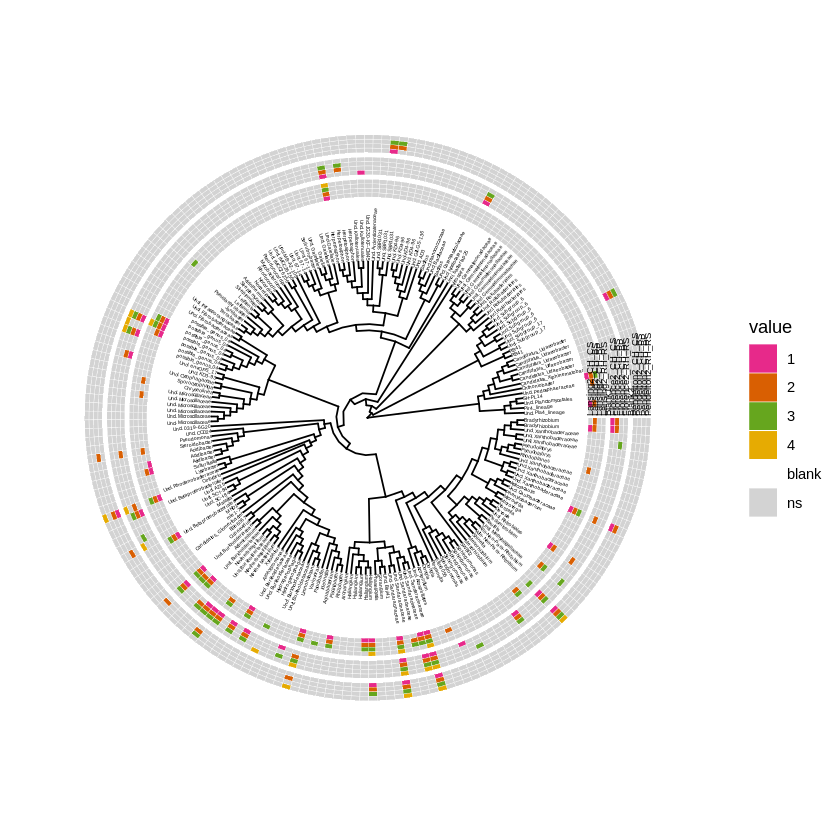

In [82]:
p  = ggtree(MyTree, layout = "circular", branch.length = "none") %<+% df.tax
#p = ggtree(MyTree)%<+% df.tax
p = p +  geom_tiplab(aes(label = GenusLabel), align = TRUE, size = 1)

p = gheatmap(p, testcirc, offset=10, width=0.4, colnames_position = NULL, 
         colnames_angle=90, hjust=0, colnames_offset_y = .25, font.size = 2) +
       scale_fill_manual(breaks=c( "1", "2","3","4", "blank", "ns" ),values=c(cs[4],cs[2],cs[5],cs[6], "White", "Light Grey"))
           # scale_fill_viridis_d(option="D", name='discrete\nvalue')
            # scale_color_manual(breaks=c("ns", "sig"), values=c("White", "Red"), name="HASV")


#p2 <- p1 + new_scale_fill()
p

outfile = file.path(out_Dir, 'CircularTree_controls.pdf')
pdf(outfile, width = 9.5, height = 7.5, useDingbats = FALSE)
p
dev.off()

In [33]:
# heatmap.colours <- c("white","grey","seagreen3","darkgreen",
#                     "green","brown","tan","red","orange",
#                     "pink","magenta","purple","blue","skyblue3",
#                     "blue","skyblue2")
# names(heatmap.colours) <- 0:15

gheatmap(p, heatmapData, offset = 10, color=NULL, 
         colnames_position="top", 
         colnames_angle=90, colnames_offset_y = 1, 
         hjust=0, font.size=2) 
#   scale_fill_manual(values=heatmap.colours, breaks=0:15)
# heatmap.colours <- c("white","grey","seagreen3","darkgreen",
#                     "green","brown","tan","red","orange",
#                     "pink","magenta","purple","blue","skyblue3",
#                     "blue","skyblue2")
# names(heatmap.colours) <- 0:15
# heatmap.colours = c("White", "Red")

##ggtree example
# gheatmap(p, heatmapData, offset = 10, color=NULL, 
#          colnames_position="top", 
#          colnames_angle=90, colnames_offset_y = 1, 
#          hjust=0, font.size=2) +
#   scale_fill_manual(values=heatmap.colours, breaks=0:15)

names(heatmap.colours) = c("ns", "sig")
heatmap.colours




ERROR: Error in ncol(data): object 'heatmapData' not found


## Heatmap figure

In [ ]:
### Get responder colorstrips

In [26]:
mdf = psmelt(physeq.thresh)
mdf.byOTU = ddply(mdf, .(Soil, SampleType, OTU, Experiment), summarize, mean_Abundance = mean(Abundance))
head(mdf.byOTU)
# mdf.F.byOTU = filter(mdf.byOTU, Soil == "Florence" & SampleType == 'CH')
# mdf.L.byOTU = filter(mdf.byOTU, Soil == "Lansing" & SampleType == 'CH')
# mdf.P.byOTU = filter(mdf.byOTU, Soil == "Pendelton" & SampleType == 'CH')
# head(mdf.F.byOTU)

Warning message in psmelt(physeq.thresh):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’
Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


Soil,SampleType,OTU,Experiment,mean_Abundance
Florence,CH,ASV100,1,0.0007582158
Florence,CH,ASV100,2,0.0015091146
Florence,CH,ASV101,1,0.0008770968
Florence,CH,ASV101,2,0.0004350364
Florence,CH,ASV103,1,0.0045006324
Florence,CH,ASV103,2,0.0015183456


In [27]:
df.ra = dcast(mdf.byOTU, OTU ~ Experiment + SampleType + Soil, value.var = "mean_Abundance")
rownames(df.ra) = df.ra$OTU
df.ra = select(df.ra, "1_CS_Lansing", "2_CS_Lansing", "1_CS_Florence", "2_CS_Florence", "1_CS_Pendelton", "2_CS_Pendelton",
              "1_CH_Lansing", "2_CH_Lansing", "1_CH_Florence", "2_CH_Florence", "1_CH_Pendelton", "2_CH_Pendelton")
head(df.ra)

,1_CS_Lansing,2_CS_Lansing,1_CS_Florence,2_CS_Florence,1_CS_Pendelton,2_CS_Pendelton,1_CH_Lansing,2_CH_Lansing,1_CH_Florence,2_CH_Florence,1_CH_Pendelton,2_CH_Pendelton
ASV100,0.001563717,3.048388e-03,0.0009907606,0.0017838697,0.000000000,0.0017289679,0.0000000000,0.0033556499,0.0007582158,0.0015091146,0.000000000,0.0016067854
ASV101,0.000000000,2.179030e-03,0.0036154030,0.0027190395,0.000655730,0.0017271379,0.0000000000,0.0012225247,0.0008770968,0.0004350364,0.000000000,0.0006505861
ASV103,0.005145047,3.777696e-03,0.0242719555,0.0026366959,0.021283531,0.0007089811,0.0018429894,0.0013360912,0.0045006324,0.0015183456,0.006095402,0.0000000000
ASV104,0.001197625,2.599790e-03,0.0037648068,0.0009712141,0.002414126,0.0056020170,0.0000000000,0.0003111974,0.0042629982,0.0004498436,0.000593988,0.0020888437
ASV1053,0.002980874,2.266905e-05,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.0098664360,0.0001234304,0.0000000000,0.0000000000,0.000000000,0.0000000000
ASV106,0.003835186,3.748473e-03,0.0000000000,0.0000000000,0.000000000,0.0000000000,0.0001846138,0.0019151099,0.0000000000,0.0000000000,0.000000000,0.0000000000


In [28]:
install.packages("ggnewscale")

In [30]:
library(ggnewscale)

In [31]:
df.l2fc %>% head()

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,OTU,Soil,Fungus,Term,Contrast,DAI,Kingdom,Phylum,Class,Order,Family,Genus,Experiment
331.72029,-2.716566,0.5217389,-5.206754,1.921730e-07,1.885675e-05,ASV5,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Actinobacteria,Actinobacteria,Micrococcales,Micrococcaceae,Pseudarthrobacter,1
136.95264,4.977612,1.1905977,4.180767,2.905274e-05,1.192425e-03,ASV6,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Cellvibrionales,Cellvibrionaceae,Cellvibrio,1
0.00000,NA,NA,NA,NA,NA,ASV8,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Alphaproteobacteria,Caulobacterales,Caulobacteraceae,Asticcacaulis,1
0.00000,NA,NA,NA,NA,NA,ASV13,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Xanthomonadales,Xanthomonadaceae,Luteimonas,1
26.70389,8.430000,1.7857267,4.720767,2.349571e-06,1.478663e-04,ASV14,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Deltaproteobacteria,Myxococcales,Sandaracinaceae,NA,1
0.00000,NA,NA,NA,NA,NA,ASV15,Lansing,Gv,SampleType,CH_CS,81,Bacteria,Proteobacteria,Gammaproteobacteria,Betaproteobacteriales,Burkholderiaceae,NA,1


In [32]:

tmp = df.l2fc %>% 
    #filter(Experiment == 1 & Subset == 'Lansing-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS" & Subset %in% c('Lansing-Gv', 'Florence-Gv', 'Pendelton-Gv')) %>% 
    mutate(HASV = ifelse(padj < 0.05 & log2FoldChange > 0, "HASV", "ns")) %>%
    mutate(HASV = ifelse(!is.na(HASV), HASV, "ns")) %>%
    select(OTU, HASV, Experiment, Subset)
#head(tmp)
tmp = dcast(tmp, OTU ~ Experiment + Subset, value.var = "HASV") 
rownames(tmp) = tmp$OTU
tmp = select(tmp, "1_Lansing-Gv", "2_Lansing-Gv", "1_Florence-Gv", "2_Florence-Gv", "1_Pendelton-Gv", "2_Pendelton-Gv")
# tmp1 = select(tmp, "1_Lansing-Gv", "2_Lansing-Gv") #, 1_Florence-Gv, 2_Florence-Gv, 1_Pendelton-Gv, 2_Pendelton-Gv) %>% as.matrix()
# tmp2 = select(tmp, "1_Florence-Gv", "2_Florence-Gv")

#tmp %>% filter(OTU == "ASV18")


p  = ggtree(MyTree, layout = "circular", branch.length = "none") %<+% df.tax
p = p +  geom_tiplab()
p1 = gheatmap(p, tmp, offset=0.8, width=0.4,  
         colnames_angle=95, hjust=0, colnames_offset_y = .25) +
            scale_fill_viridis_d(option="D", name='discrete\nvalue')
#             scale_color_manual(breaks=c("ns", "HASV"), 
#          values=c("Red", "White"), name="HASV")


p2 <- p1 + new_scale_fill()

gheatmap(p2, df.ra, offset=1.3, width=1,
         colnames_angle=90, colnames_offset_y = .25) +
    scale_fill_viridis_c(option="cividis", name="continuous\nvalue")
# gheatmap(p1, tmp[,5:6, drop =FALSE], offset=5, width=0.5, font.size=3, 
#          colnames_angle=-45, hjust=0)+
#     

ERROR: Error: Problem with `filter()` input `..1`.
✖ object 'Subset' not found
ℹ Input `..1` is `&...`.


# vignette

In [ ]:
genotype_file <- system.file("examples/Genotype.txt", package="ggtree")
genotype <- read.table(genotype_file, sep="\t", stringsAsFactor=F)
head(genotype)

beast_file <- system.file("examples/MCC_FluA_H3.tree", package="ggtree")
beast_tree <- read.tree(beast_file)

# colnames(genotype) <- sub("\\.$", "", colnames(genotype))
# p <- ggtree(beast_tree, mrsd="2013-01-01") + 
#     geom_treescale(x=2008, y=1, offset=2) + 
#     geom_tiplab(size=2)
# gheatmap(p, genotype, offset=5, width=0.5, font.size=3, 
#         colnames_angle=-45, hjust=0) +
#     scale_fill_manual(breaks=c("HuH3N2", "pdm", "trig"), 
#         values=c("steelblue", "firebrick", "darkgreen"), name="genotype")

In [ ]:
head(snp_data)

In [ ]:
head(p)

In [ ]:

bar_data %>% filter(id == "DE0655_HCMC_2001")
#head(p)
snp_data %>% filter(name == "DE0655_HCMC_2001")

p$data %>% filter(label == "DE0655_HCMC_2001")

Found more than one class "phylo" in cache; using the first, from namespace 'phyloseq'
Also defined by ‘tidytree’


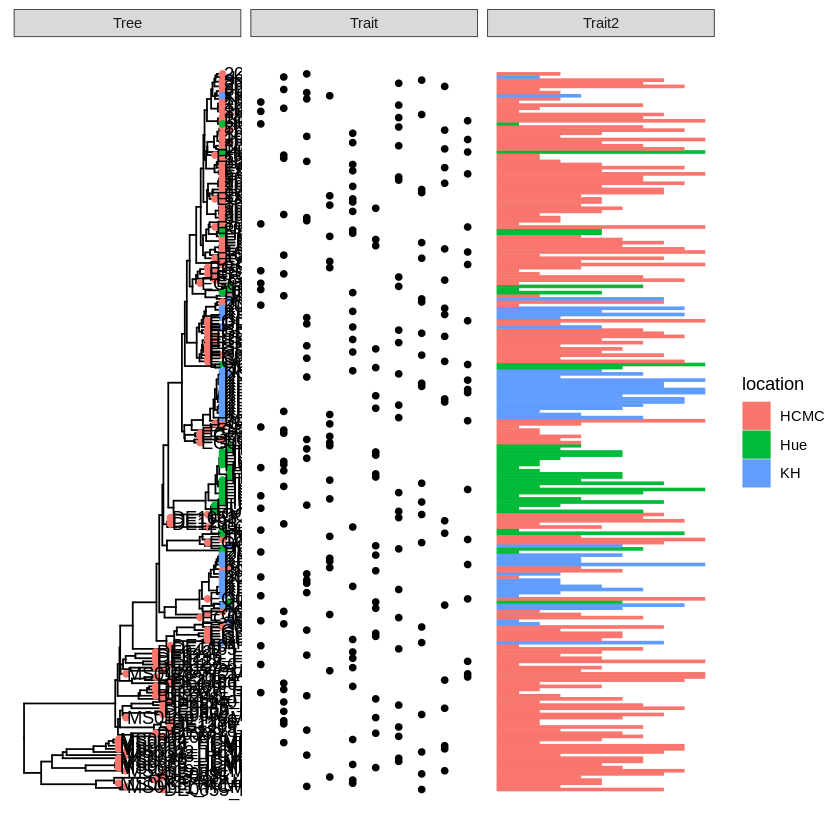

In [741]:
remote_folder <- paste0("https://raw.githubusercontent.com/katholt/",
                        "plotTree/master/tree_example_april2015/")

## read the phylogenetic tree
tree <- read.tree(paste0(remote_folder, "tree.nwk"))

## read the sampling information data set
info <- read.csv(paste0(remote_folder,"info.csv"))

## read and process the allele table
snps<-read.csv(paste0(remote_folder, "alleles.csv"), header = F,
                row.names = 1, stringsAsFactor = F)
snps_strainCols <- snps[1,] 
snps<-snps[-1,] # drop strain names
colnames(snps) <- snps_strainCols


gapChar <- "?"
snp <- t(snps)
lsnp <- apply(snp, 1, function(x) {
        x != snp[1,] & x != gapChar & snp[1,] != gapChar
    })
lsnp <- as.data.frame(lsnp)
lsnp$pos <- as.numeric(rownames(lsnp))
lsnp <- tidyr::gather(lsnp, name, value, -pos)
snp_data <- lsnp[lsnp$value, c("name", "pos")]

## read the trait data
bar_data <- read.csv(paste0(remote_folder, "bar.csv"))

## visualize the tree 
p <- ggtree(tree) 

## attach the sampling information data set 
## and add symbols colored by location
p <- p %<+% info + geom_tippoint(aes(color=location)) 

## visualize SNP and Trait data using dot and bar charts,
## and align them based on tree structure
p + 
    geom_tiplab() +
#    geom_facet(panel = "SNP", data = snp_data, geom = geom_point, 
#                mapping=aes(x = pos,y color = location), shape = '|') 
    geom_facet(panel = "Trait", data = bar_data, geom= geom_point,
              aes(x = dummy_bar_value))+
    geom_facet(panel = "Trait2", data = bar_data, geom = ggstance::geom_barh, 
                aes(x = dummy_bar_value, color = location, fill = location), 
                stat = "identity", width = .6) #+
    #theme_tree2(legend.position=c(.05, .85))

In [ ]:
head(bar_data)

# Create annotation files for iTOL

## Hyphal ASVs

In [ ]:
readfile = file.path(work_dir, 'dfl2fc-Exp1.txt')
df.l2fc.Exp1 = read.table(readfile, header = TRUE, sep= '\t')

readfile = file.path(work_dir, 'dfl2fc-Exp2.txt')
df.l2fc.Exp2 = read.table(readfile, header = TRUE, sep= '\t')

df.l2fc = bind_rows(df.l2fc.Exp1, df.l2fc.Exp2)

In [ ]:
head(df.l2fc)
tail(df.l2fc)

In [ ]:
df.l2fc$Subset %>% unique

In [ ]:
#ffffcc - Lansing 1
#ffeda0 - Lansing 2
#fed976
#feb24c - Florence 1
#fd8d3c - Florence 2
#fc4e2a
#e31a1c
#bd0026 - Pendelton 1
#800026 - Pendelton 2

In [ ]:
tmp = df.l2fc %>% 
    filter(Experiment == 1 & Subset == 'Lansing-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS") %>% 
    mutate(Color = ifelse(padj < 0.05 & log2FoldChange > 0, "#ffffcc", "#ffffff")) %>%
    mutate(Color = ifelse(!is.na(Color), Color, "#ffffff")) %>%
    select(OTU, Color)
write.table(tmp, file = file.path(out_Dir, "HA-Lansing1.txt"), sep = "\t", row.names = FALSE, quote = FALSE)

tmp = df.l2fc %>% 
    filter(Experiment == 2 & Subset == 'Lansing-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS") %>% 
    mutate(Color = ifelse(padj < 0.05 & log2FoldChange > 0, "#ffeda0", "#ffffff")) %>%
    mutate(Color = ifelse(!is.na(Color), Color, "#ffffff")) %>%
    select(OTU, Color)
write.table(tmp, file = file.path(out_Dir, "HA-Lansing2.txt"), sep = "\t", row.names = FALSE, quote = FALSE)

In [ ]:
tmp = df.l2fc %>% 
    filter(Experiment == 1 & Subset == 'Florence-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS") %>% 
    mutate(Color = ifelse(padj < 0.05 & log2FoldChange > 0, "#feb24c", "#ffffff")) %>%
    mutate(Color = ifelse(!is.na(Color), Color, "#ffffff")) %>%
    select(OTU, Color)
write.table(tmp, file = file.path(out_Dir, "HA-Florence1.txt"), sep = "\t", row.names = FALSE, quote = FALSE)

tmp = df.l2fc %>% 
    filter(Experiment == 2 & Subset == 'Florence-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS") %>% 
    mutate(Color = ifelse(padj < 0.05 & log2FoldChange > 0, "#fd8d3c", "#ffffff")) %>%
    mutate(Color = ifelse(!is.na(Color), Color, "#ffffff")) %>%
    select(OTU, Color)
write.table(tmp, file = file.path(out_Dir, "HA-Florence2.txt"), sep = "\t", row.names = FALSE, quote = FALSE)

In [ ]:
tmp = df.l2fc %>% 
    filter(Experiment == 1 & Subset == 'Pendelton-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS") %>% 
    mutate(Color = ifelse(padj < 0.05 & log2FoldChange > 0, "#bd0026", "#ffffff")) %>%
    mutate(Color = ifelse(!is.na(Color), Color, "#ffffff")) %>%
    select(OTU, Color)
write.table(tmp, file = file.path(out_Dir, "HA-Pendelton1.txt"), sep = "\t", row.names = FALSE, quote = FALSE)

tmp = df.l2fc %>% 
    filter(Experiment == 2 & Subset == 'Pendelton-Gv') %>%
    filter(OTU %in% TreeTax & Contrast == "CH_CS") %>% 
    mutate(Color = ifelse(padj < 0.05 & log2FoldChange > 0, "#800026", "#ffffff")) %>%
    mutate(Color = ifelse(!is.na(Color), Color, "#ffffff")) %>%
    select(OTU, Color)
write.table(tmp, file = file.path(out_Dir, "HA-Pendelton2.txt"), sep = "\t", row.names = FALSE, quote = FALSE)

## Relative abundance data

### Mean of two experiments both sample types

### Hyphal samples only stacked by experiment

In [ ]:
mdf.byOTU = ddply(mdf, .(Soil, SampleType, OTU, Experiment), summarize, mean_Abundance = mean(Abundance))

mdf.F.byOTU = filter(mdf.byOTU, Soil == "Florence" & SampleType == 'CH')
mdf.L.byOTU = filter(mdf.byOTU, Soil == "Lansing" & SampleType == 'CH')
mdf.P.byOTU = filter(mdf.byOTU, Soil == "Pendelton" & SampleType == 'CH')
head(mdf.F.byOTU)

In [ ]:
dfc.F = dcast(mdf.F.byOTU, OTU ~ Experiment) 
dfc.L = dcast(mdf.L.byOTU, OTU ~ Experiment)    
dfc.P = dcast(mdf.P.byOTU, OTU ~ Experiment) 

In [ ]:
write.table(dfc.F, file.path(out_Dir,'Florence_Abund.txt'), sep = "\t", 
            row.names = FALSE, quote = FALSE)
write.table(dfc.L, file.path(out_Dir,'Lansing_Abund.txt'), sep = "\t", 
            row.names = FALSE, quote = FALSE)
write.table(dfc.P, file.path(out_Dir,'Pendelton_Abund.txt'), sep = "\t", 
            row.names = FALSE, quote = FALSE)